In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def plot_acc_curves(acclist, title, botlim = 0, toplim = 1):
    
    plt.figure(figsize=(10, 7))
    plt.suptitle(title,fontsize=20)
    #plt.subplot(211)
    plt.xlabel('Round',fontsize=14)

    plt.ylabel('Accuracy',fontsize=14)
    plt.ylim(bottom=botlim,top= toplim)
    for al in acclist:
        eporange = np.arange(len(list(acclist[al]))+1)
        thelist = np.insert(acclist[al],0,0)
        plt.plot(eporange, thelist , '.-', label=str(al), alpha=50)

    
    plt.legend(loc='lower right',fontsize=14)
    plt.show()


In [3]:
def plot_f1_curves(acclist, title, botlim = 0, toplim = 1):
    
    plt.figure(figsize=(10, 7))
    plt.suptitle(title,fontsize=20)
    #plt.subplot(211)
    plt.xlabel('Round',fontsize=14)

    plt.ylabel('F1 score',fontsize=14)
    plt.ylim(bottom=botlim,top= toplim)
    for al in acclist:
        eporange = np.arange(len(list(acclist[al]))+1)
        thelist = np.insert(acclist[al],0,0)
        plt.plot(eporange, thelist , '.-', label=str(al), alpha=50)

    
    plt.legend(loc='lower right',fontsize=14)
    plt.show()


In [4]:
def bar_plot_acc(labels, cen, fl1, fl2):
    x = np.arange(len(labels))  # the label locations
    width = 0.25 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='centralized')
    rects2 = ax.bar(x , fl1, width, label='FedAvg with 3 clients and 20% skewness')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg with 3 clients and 40% skewness')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy %',fontsize=14)
    ax.set_title('accuracy accross models',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)

    ax.legend()
    
    plt.ylim(bottom=.6)
    
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:0.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel(rects1)
    def autolabel2(rectcent, rects):
        for reo, rect in zip(rectcent, rects):
            height_dif = reo.get_height() - rect.get_height()
            height = rect.get_height()
            ax.annotate('- {:0.2f}%'.format(height_dif),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel2(rects1, rects2)
    autolabel2(rects1, rects3)

    _=plt.show()


#cen = [list(acc_dic.values())[0][24]*100,list(acc_dic2.values())[0][24]*100,list(acc_dic3.values())[0][24]*100] 
#fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100] 
#fl2 = [list(acc_dic.values())[2][24]*100,list(acc_dic2.values())[2][24]*100,list(acc_dic3.values())[2][24]*100]
labels = ['ResNet34', 'Alexnet', 'LeNet']
    
#bar_plot_acc(labels, cen, fl1, fl2)    



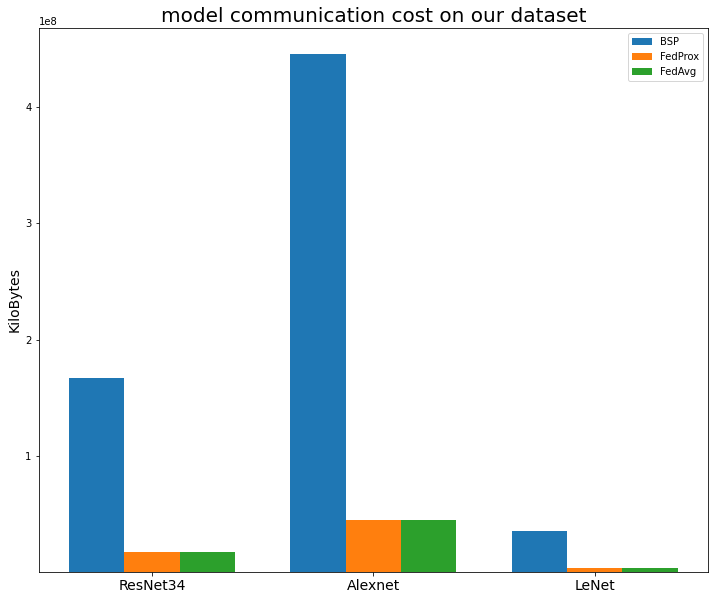

In [5]:
def bar_plot_comumication(labels, cen, fl1, fl2):
    x = np.arange(len(labels))  # the label locations
    width = 0.25 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='BSP')
    rects2 = ax.bar(x , fl1, width, label='FedProx')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('KiloBytes',fontsize=14)
    ax.set_title('model communication cost on our dataset',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)

    ax.legend()
    
    plt.ylim(bottom=.6)
    
    

    _=plt.show()


ep = 25
cln = 6
frackl = 4
btchnr = 1000
cen = [83332*btchnr*2,222954*btchnr*2,17587*btchnr*2] 
#fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100] 
fl2 = [83332*frackl*ep*2,222954*frackl*ep*2,17587*frackl*ep*2]
fl1 = [83332*frackl*ep*2,222954*frackl*ep*2,17587*frackl*ep*2]

labels = ['ResNet34', 'Alexnet', 'LeNet']
    
bar_plot_comumication(labels, cen, fl1, fl2)    

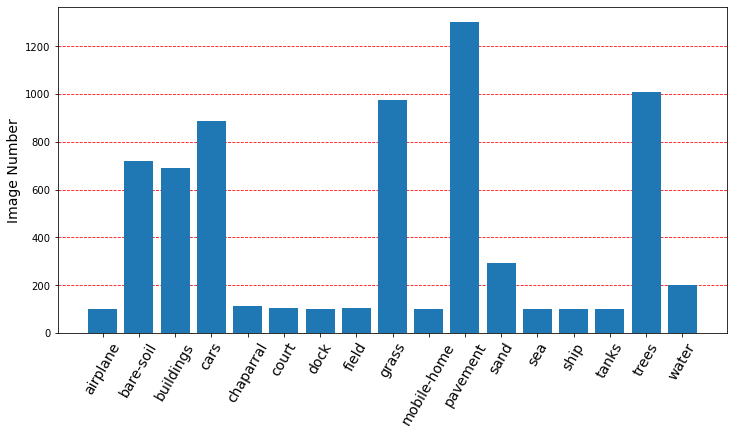

In [6]:
import pandas as pd

df = pd.read_excel ('./multilabels/LandUse_Multilabeled.xlsx')
df_label = np.array(df)
image_perlabel = np.sum(df_label[:, 1:], axis=0)
class_names = np.array(["airplane", "bare-soil", "buildings", "cars", "chaparral", "court", "dock",
                        "field", "grass", "mobile-home", "pavement", "sand", "sea", "ship", "tanks", "trees", "water"])
x = np.arange(17)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_axisbelow(True)
ax.grid(axis='y',color='red', linestyle='dashed')

plt.bar(x, image_perlabel)
ax.set_ylabel('Image Number',fontsize=14)
plt.xticks(x, class_names, rotation=60, fontsize = 14)
plt.show()

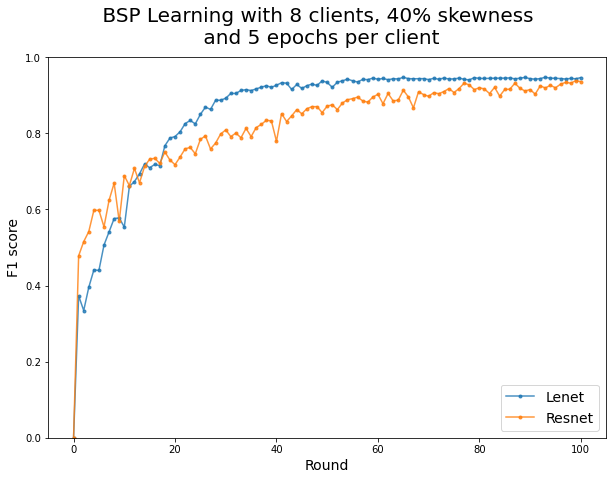

In [8]:

acc_dic_n3 ={"Lenet" : np.genfromtxt('BSP_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_15_49.csv',delimiter=',')[2,:],
             "Resnet" : np.genfromtxt('BSP_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_18_45.csv',delimiter=',')[2,:]
}    
plot_f1_curves(acc_dic_n3,' BSP Learning with 8 clients, 40% skewness \n and 5 epochs per client',0,1)